# Participation - Week 11
## CSCI 4622 - 2024 Fall

### (Exploring Decision Boundaries from various models)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics

import sklearn.linear_model
import sklearn.svm

__STEP 0: Use the last 5 digits of your buffone card ID number as your random state seed in the following cell__

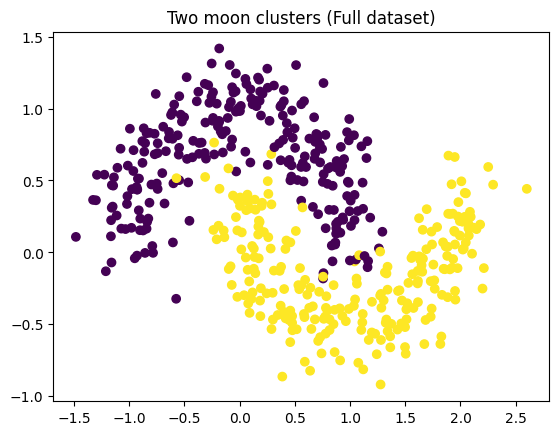

In [ ]:
X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.19, random_state=78578) #TODO: Change random_state to the last 5 digits of your BuffOne card
X_train, y_train = X[:350], y[:350]
X_test, y_test = X[350:], y[350:]
plt.title("Two moon clusters (Full dataset)")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

We have data!

Now, let's set up the old decision surface visualizer we used in HW1 (and Participation 3).

In [ ]:
def show_decision_surface(model):
    """
    Helper function to visualize the decision surface of model
    :param model: Initialized Classifier
    :return: None
    """
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_grid = np.arange(x_min, x_max, 0.1)
    y_grid = np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1,1), yy.reshape(-1,1)
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='PiYG')
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

Let's fit the half-moon data into some of the models we haven't explored yet. First, a Logistic Regression.

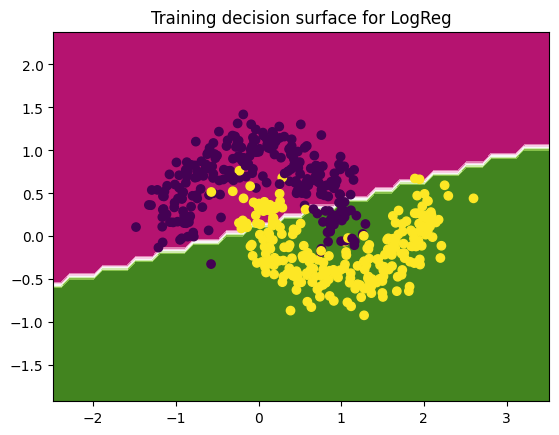

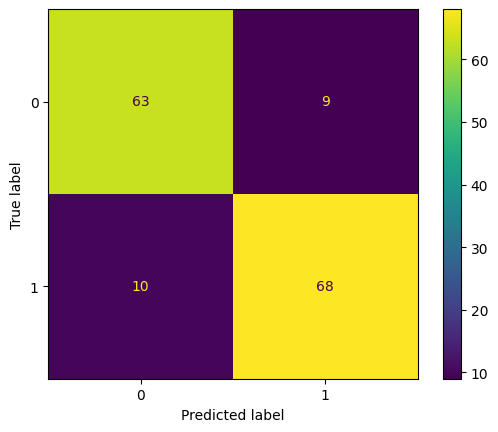

In [ ]:
model = sklearn.linear_model.LogisticRegression()
model = model.fit(X_train, y_train)
plt.title("Training decision surface for LogReg")
show_decision_surface(model)
y_pred = model.predict(X_test)
conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf)
disp.plot()
plt.show()

**1) How did Logistic Regression do? What does the decision boundary look like?**

It is good, with an accuracy of 87 percent. The decision boundary looks zig-zagged, which is a possible indication of overfitting the model.

Next, let's build a series of Support Vector Classifiers. We're going to use four different kernels - Linear, Polynomial, Radial Basis Function, and Sigmoid.

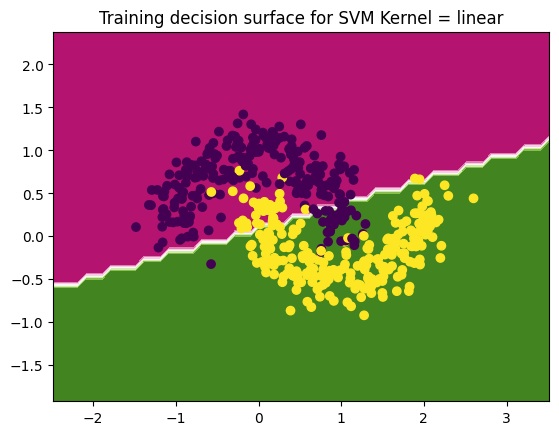

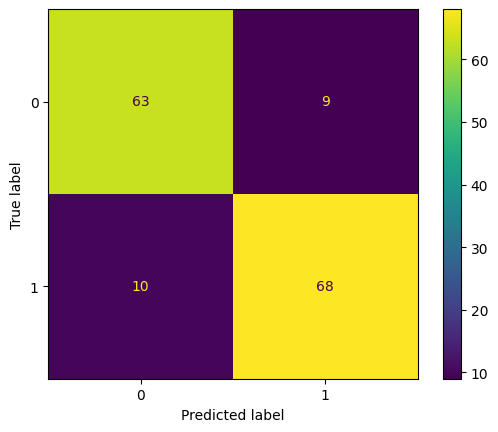

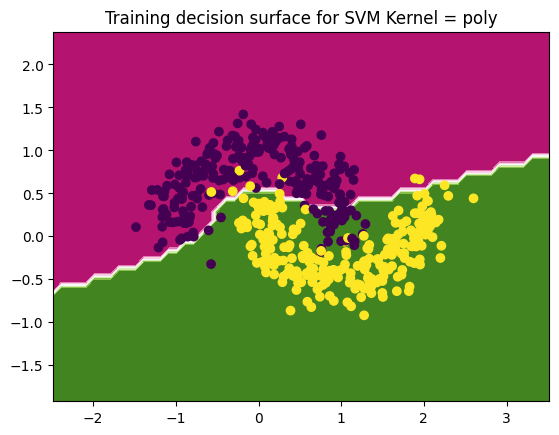

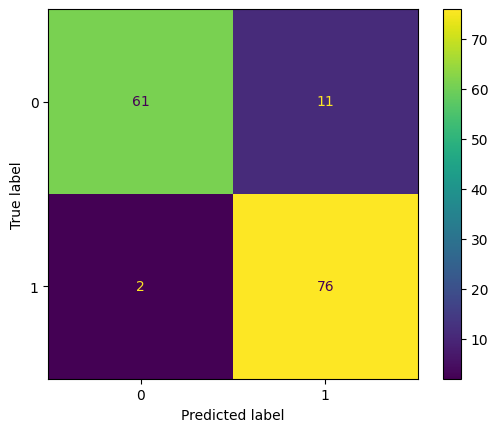

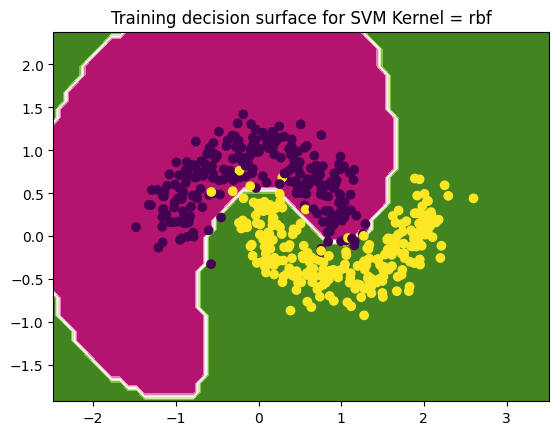

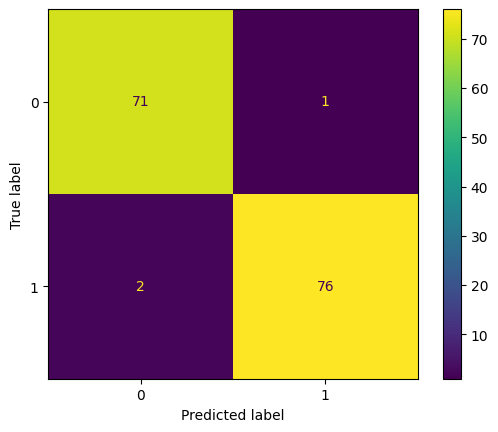

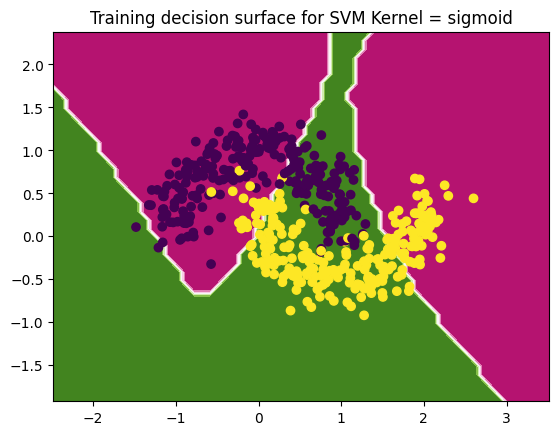

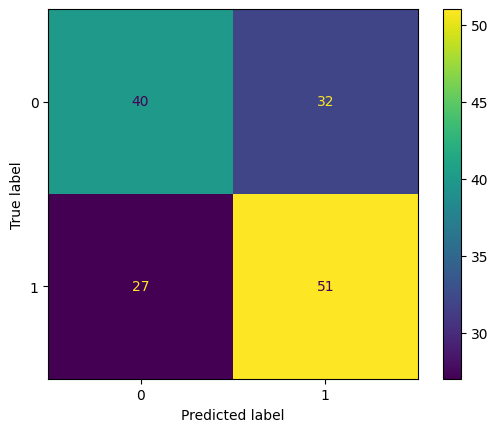

In [ ]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

for option in kernels:
  model = sklearn.svm.SVC(kernel=option)
  model = model.fit(X_train, y_train)
  plt.title("Training decision surface for SVM Kernel = {}".format(option))
  show_decision_surface(model)
  y_pred = model.predict(X_test)
  conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
  disp = sklearn.metrics.ConfusionMatrixDisplay(conf)
  disp.plot()
  plt.show()

**2a-d) How did each Support Vector Classifier do? What does the decision boundary look like?**

The linear model, the accuracy is as good as the logisitc regression, or close to it in terms of accuracy. (Around 87 percent). The decision boundary also looks zig-zagged here though it does not accomodate for the yellow data points that were interleaving with the purple area or the blue data points.

For the polynomial model, the accuracy is a little higher than the linear, with an accuracy of 91 percent. In here, the decision boundary was accomodating for the yellow data points that were interleaving or mixing with the blue data points, hence the higher accuracy rate.

For the radial basis function, the accuracy was as good as the polynomial model with an accuracy of 91 percent. The decision boundary tended to focus more on the outliers of the data which is generally not a good idea because it could lead to overfitting with possibly another data set other than this.


For the sigmoid function, the accuracy was very poor in comparison to the other model with an accuracy of 61 percent. The reason being is the decision boundary which acted very poorly in a way that gave us this poor accuracy.

**3) See how you can manipulate the Kernel and SVC parameters to improve the accuracy of the different versions in the cell below How good can each do?**

*Don't worry about being fully exhaustive here, just try some stuff out and reflect on the results.*

*read the [SVC documentation](https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html) for more information on what arguments can be used.*

In [ ]:
#Your space for trying out Kernel and SVC arguments
from sklearn import svm, metrics
kernels = {
    "linear": {"C": 1},
    "poly": {"C": 1, "degree": 3},
    "rbf": {"C": 10},
    "sigmoid": {"C": 0.01, "gamma": "scale"}
}
y_pred_lst = []

for option, params in kernels.items():
    model = sklearn.svm.SVC(kernel=option, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = metrics.accuracy_score(y_test, y_pred)
    y_pred_lst.append(y_pred)

y_pred_lst


[0.8733333333333333,
 0.9133333333333333,
 0.9866666666666667,
 0.7933333333333333]

I added different paramters for different models. I assigned all a C value and I was able to test different values for C and I was able to find the optimal values given above as you can see. I also provided a value for the degree of the polynomial and found an optimal value as well. I was able to increase the value for the accuracies for most of the models (except linear and polynomial).

I also provided gamma with scale as a third paramter for sigmoid.

Radial Basis Function: 91 -> 99

Sigmoid Function: 61 -> 79
